In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dataset import *
from torchvision.utils import save_image
import math
import numpy as np
import torch
from matplotlib import pyplot as plt
  

In [3]:
dataset1 = FastmriKnee('/home/liuchun/dual_domain/data/knee_singlecoil_1000_nor.npz')
dataset=DatasetReconMRI(dataset1)
train_loader,val_loader,test_loader=build_loader(dataset,batch_size=1)

In [4]:
 


# ========================== UTILITY ====================================
from matplotlib.colors import Normalize

def imgshow(im, cmap=None, dpi=100, figsize=(6.4, 4.8)):
    if isinstance(im, torch.Tensor):
        im = im.to('cpu').detach().cpu().numpy()

    plt.figure(dpi=dpi, figsize=figsize)
    norm_obj = Normalize(vmin=im.min(), vmax=im.max())
    plt.imshow(im, norm=norm_obj, cmap=cmap)
    plt.colorbar()
    plt.show()
    plt.close('all')
    
def imsshow(imgs, titles=None, num_col=5, dpi=100, cmap=None, is_colorbar=False):
    '''
    assume imgs's shape is (Nslice, Nx, Ny)
    '''
    num_imgs = len(imgs)
    num_row = math.ceil(num_imgs / num_col)
    plt.figure(dpi=dpi, figsize=(2 + num_col * 3, 2 + num_row * 3))
    for i in range(num_imgs):
        plt.subplot(num_row, num_col, i + 1)
        plt.imshow(imgs[i], cmap=cmap)
        if is_colorbar:
            plt.colorbar()
        if titles:
            plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])
    plt.show()
    plt.close('all')
    

torch.Size([3, 256, 256])


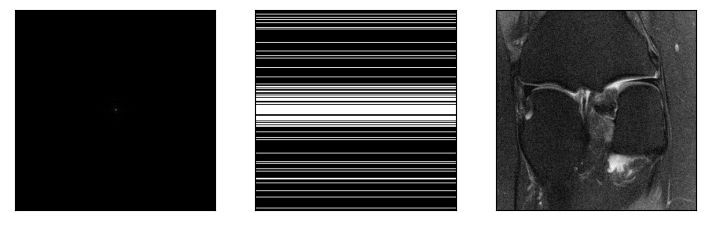

In [66]:
import matplotlib.pyplot as plt # plt 用于显示图片

import numpy as np

show_list=[]
for iter_num, data_batch in enumerate(val_loader):
    
    k_und=data_batch[0] 
    und_mask=data_batch[1]   #mask不用参与运算？？不用是tensor?
    im_gt = data_batch[2] 
    #if need to ads?
    k_und1=pseudo2real(k_und)#torch.Size([1, 2, 256, 256]) torch.float32
    im_gt1=pseudo2real(im_gt)#torch.Size([1, 2, 256, 256]) torch.float32
    # print(k_und.shape,k_und.dtype)
    # print(und_mask.shape,und_mask.dtype)
    # print(im_gt.shape,im_gt.dtype)
    '''
    k_und   und_mask     im_gt  are all float (1,256,256)
    
    '''
    
    # imgs=torch.ones(1,256,256)
    if iter_num==30:
        show_list.append(k_und)
        show_list.append(im_gt)
        show_list.append(und_mask)
        imgs=torch.cat((k_und1,und_mask,im_gt1),0)
        break
# for i in 
print(imgs.shape)
imsshow(imgs,cmap='gray')
#img save the three images


torch.Size([256, 256]) torch.float32
torch.Size([256, 256]) torch.float32


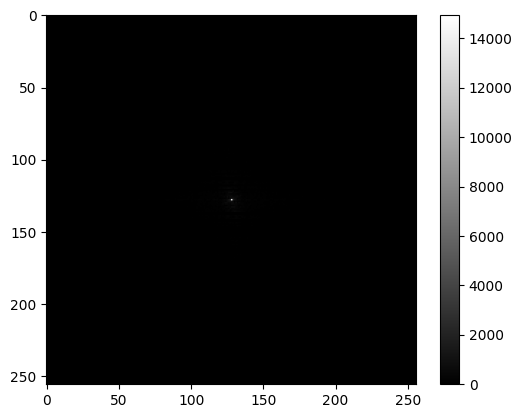

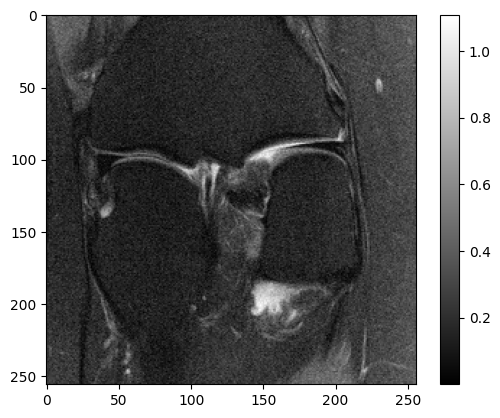

torch.Size([1, 256, 256])
(256, 256)


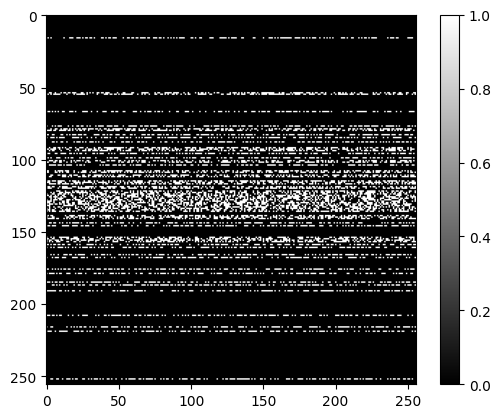

In [50]:
#show the image of uniform mask
from utils import *

import sys
sys.path.append('..')
from mask.gen_mask import *

kspace=imgs[0]
und_mask=imgs[1]
gt_img=imgs[2]

print(kspace.shape,kspace.dtype) #torch.Size([256, 256]) torch.float32
print(gt_img.shape,gt_img.dtype) #torch.Size([256, 256]) torch.float32

# k_und=pseudo2real(kspace)#torch.Size([1, 2, 256, 256]) torch.float32
# im_gt=pseudo2real(imgs)#torch.Size([1, 2, 256, 256]) torch.float32

imgshow(kspace,cmap='gray')
imgshow(gt_img,cmap='gray')



ks= np.ones((256,256,1))
und_mask=und_mask.unsqueeze(0)
print(und_mask.shape)
select_mask_up,select_mask_down=uniform_selection(ks,und_mask)
print(select_mask_up.shape)
imgshow(select_mask_up,cmap='gray')

torch.Size([1, 2, 256, 256]) torch.float32
torch.Size([1, 2, 256, 256]) torch.float32
torch.Size([1, 256, 256]) torch.float32


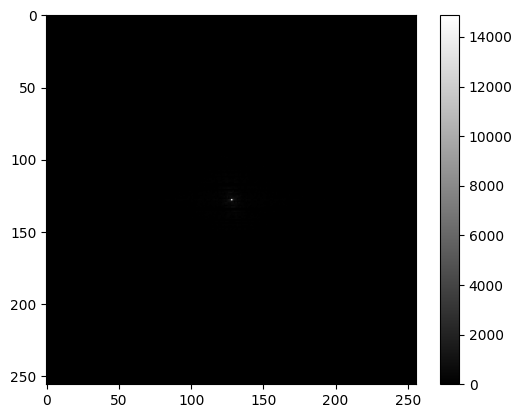

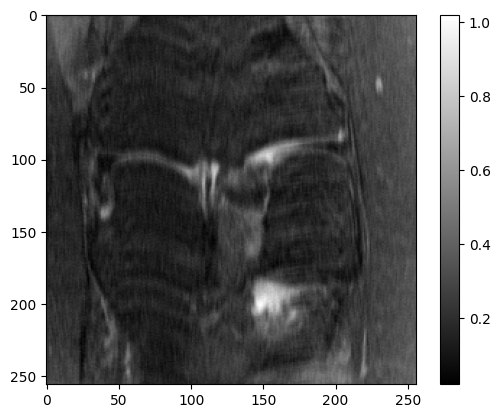

In [69]:
from utils import *

import sys
sys.path.append('..')
from mask.gen_mask import *

kspace= show_list[0]

und_mask=imgs[1]
gt_img=show_list[1]
under_mask=show_list[2]
print(kspace.shape,kspace.dtype)
print(gt_img.shape,gt_img.dtype)
print(under_mask.shape,under_mask.dtype)

ks= np.ones((256,256,1))
und_mask=und_mask.unsqueeze(0)
# kspace=kspace.unsqueeze(0)
# print(und_mask.shape)
select_mask_up,select_mask_down=uniform_selection(ks,und_mask)
'''
kspace:torch.Size([256, 256]) torch.float32
mask:(256, 256) float32
'''
# imgshow(select_mask_up,cmap='gray')

#kspace need to be complex
# print(kspace.dtype,kspace.shape)

input=pseudo2complex(kspace)
 
# select_mask_up=select_mask_up.unsqueeze(0)
select_mask_up=select_mask_up[np.newaxis,:]
 
x_u, k_u=np_undersample(pseudo2complex(kspace),under_mask) #x_u torch.Size([256, 256]) torch.complex64  k_u torch.Size([256, 256]) torch.complex64
x_u=pseudo2real(complex2pseudo(x_u))
k_u=pseudo2real(complex2pseudo(k_u))
 
x_u =x_u[0]
k_u =k_u[0]
imgshow(k_u,cmap='gray')
imgshow(x_u,cmap='gray')

In [8]:
# t = tqdm(dataloader, desc=mode + 'ing', total=int(len(dataloader))) if rank == 0 else dataloader
save_excel=[]
for iter_num, data_batch in enumerate(train_loader):
    k_und=data_batch[0] 
    und_mask=data_batch[1]   #mask不用参与运算？？不用是tensor?
    im_gt = data_batch[2] 

print(k_und.shape,k_und.dtype)
print(und_mask.shape,und_mask.dtype)
print(im_gt.shape,im_gt.dtype)

torch.Size([1, 2, 256, 256]) torch.float32
torch.Size([1, 256, 256]) torch.float32
torch.Size([1, 2, 256, 256]) torch.float32


In [ ]:
#show the image

  
img_show=torch.cat((im_gt1,pseudo2real(under_img).squeeze(),output_up1),0)
count=iter_num+count
save_image(img_show,f'{results_save_path}/{count}.png')

In [2]:
x=[1,2,3,4,5]
a,b,c,d,e=x
f = [a,b,c,d,e]
print(f)

[1, 2, 3, 4, 5]
